# My E commerce behavior analysis project



In [41]:
import os
import json
import pandas as pd
import shap
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [15]:
df_olist_geolocation_dataset = pd.read_csv("olist_geolocation_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")
df_olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
df_olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv("product_category_name_translation.csv")
df_olist_customers_dataset = pd.read_csv("olist_customers_dataset.csv")


In [16]:
# checking the shape
print('Geolocation dataset shape:', df_olist_geolocation_dataset.shape)
print('\nOrder items dataset shape:', df_olist_order_items_dataset.shape)
print('\nOrder payment dataset shape', df_olist_order_payments_dataset.shape)
print('\nOrder reviews dataset shape:', df_olist_order_reviews_dataset.shape)
print('\nOrders dataset shape:', df_olist_orders_dataset.shape)
print('\nproducts dataset shape:', df_olist_products_dataset.shape)
print('\nsellers dataset shape:', df_olist_sellers_dataset.shape)
print('\nproduct category name translation dataset shape:', df_product_category_name_translation.shape)
print('\nCustoners dataset shape:', df_olist_customers_dataset.shape)

Geolocation dataset shape: (1000163, 5)

Order items dataset shape: (112650, 7)

Order payment dataset shape (103886, 5)

Order reviews dataset shape: (99224, 7)

Orders dataset shape: (99441, 8)

products dataset shape: (32951, 9)

sellers dataset shape: (3095, 4)

product category name translation dataset shape: (71, 2)

Custoners dataset shape: (99441, 5)


In [17]:
# checking for info
frames = [df_olist_geolocation_dataset, df_olist_order_items_dataset, df_olist_order_payments_dataset, df_olist_order_reviews_dataset, df_olist_orders_dataset, df_olist_products_dataset, df_olist_sellers_dataset, df_product_category_name_translation, df_olist_customers_dataset]
for f in frames:
    print(f"dataframe info {f.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
dataframe info None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id      

In [18]:
# checking for missing values
for f in frames:
    print(f" null values: {f.isnull().sum()}")

 null values: geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
 null values: order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
 null values: order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
 null values: review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64
 null values: order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at        

In [19]:
# summary stats
for f in frames:
    print(f"summary statistic: {f.describe()}")

summary statistic:        geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
summary statistic:        order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000

In [20]:
df_olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [21]:
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in timestamp_cols:
    df_olist_orders_dataset[col] = pd.to_datetime(df_olist_orders_dataset[col])

df_olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [22]:
df_olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
# lets create another column for total price
df_olist_order_items_dataset['total_value'] = df_olist_order_items_dataset['price'] + df_olist_order_items_dataset['freight_value']
df_olist_order_items_dataset_ = df_olist_order_items_dataset.groupby(by = ['order_id', 'product_id', 'shipping_limit_date']).agg(
    product_counts = ('product_id', 'count'),
    total_price = ('price', 'sum'),
    total_value = ('total_value', 'sum')

).reset_index()

df_olist_order_items_dataset_.head()

,order_id,product_id,shipping_limit_date,product_counts,total_price,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,2017-09-19 09:45:35,1,58.90,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,2017-05-03 11:05:13,1,239.90,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,2018-01-18 14:48:30,1,199.00,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,2018-08-15 10:10:18,1,12.99,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,2017-02-13 13:57:51,1,199.90,218.04


In [24]:
# clean up geolocation table
df_olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [25]:
data_geo = df_olist_geolocation_dataset.sort_values(by = 'geolocation_zip_code_prefix', ascending = True).groupby(by = ['geolocation_city', 'geolocation_state']).head(1)
data_geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
771,1001,-23.550498,-46.634338,sao paulo,SP
575,1001,-23.549779,-46.633957,são paulo,SP
10166,1307,-23.556812,-46.657135,sao bernardo do campo,SP
22261,2116,-23.515978,-46.582170,são paulo,RN
50999,3203,-23.216648,-46.861371,jundiaí,SP


In [28]:
# lets merge customers table with items
data_customers = df_olist_orders_dataset.merge(df_olist_order_items_dataset, how = "inner", on = "order_id")\
    .query('order_status == "delivered"')\
    .merge(df_olist_customers_dataset, how = "inner", on = "customer_id")\
    .groupby(by=["customer_city", "customer_state"])\
    .agg(
    orders_count = ('order_id', 'nunique'),
    total_value = ("total_value", "sum"))\
    .sort_values(by="orders_count", ascending=False)\
    .merge(data_geo, how = "inner", left_on = ["customer_city", "customer_state"], right_on = ["geolocation_city", "geolocation_state"])
data_customers["location"] = data_customers["geolocation_city"].apply(lambda x: str(x).title()) + ", " + data_customers["geolocation_state"]


In [31]:
data_customers.head(10)



,orders_count,total_value,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,location
0,15045,2107960.17,1001,-23.550498,-46.634338,sao paulo,SP,"Sao Paulo, SP"
1,6601,1111732.21,20010,-22.904775,-43.172688,rio de janeiro,RJ,"Rio De Janeiro, RJ"
2,2697,405950.51,30001,-19.923989,-43.935706,belo horizonte,MG,"Belo Horizonte, MG"
3,2071,345199.05,70002,-15.790439,-47.880655,brasilia,DF,"Brasilia, DF"
4,1489,238459.72,80002,-25.439563,-49.261963,curitiba,PR,"Curitiba, PR"
5,1406,209002.90,13010,-22.905552,-47.049448,campinas,SP,"Campinas, SP"
6,1342,214805.84,90001,-30.028364,-51.230589,porto alegre,RS,"Porto Alegre, RS"
7,1188,207713.30,40010,-12.969912,-38.511830,salvador,BA,"Salvador, BA"
8,1144,157735.65,7010,-23.467578,-46.529161,guarulhos,SP,"Guarulhos, SP"
9,911,116784.58,1307,-23.556812,-46.657135,sao bernardo do campo,SP,"Sao Bernardo Do Campo, SP"


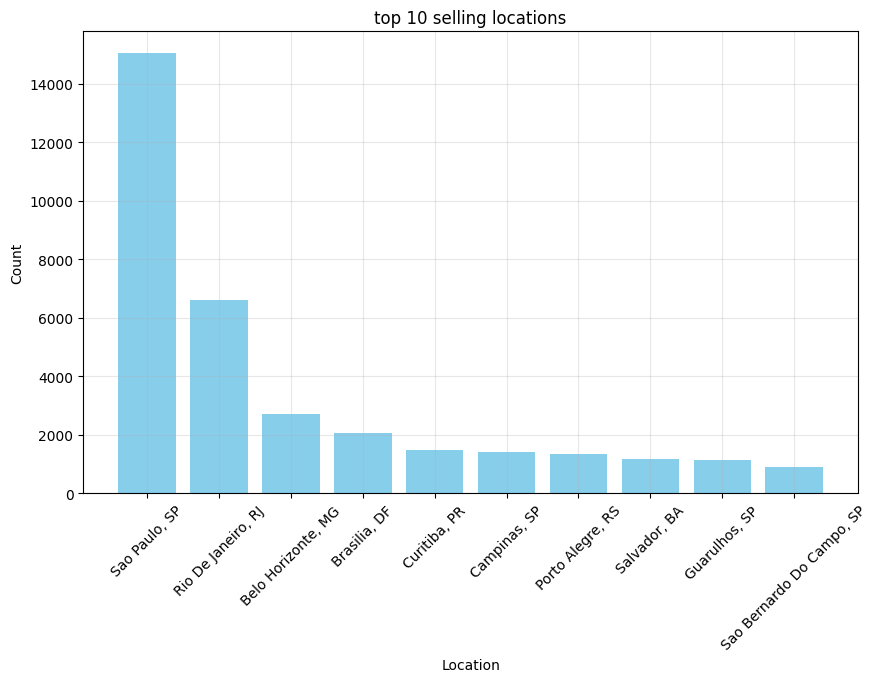

In [32]:
# draw a bar graph showing Top 10 selling geolocation
# x_axis should be the top 10 Locations and Y axis should be orders count
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(data_customers['location'].head(10), data_customers['orders_count'].head(10), color='skyblue')

plt.title('top 10 selling locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.show()

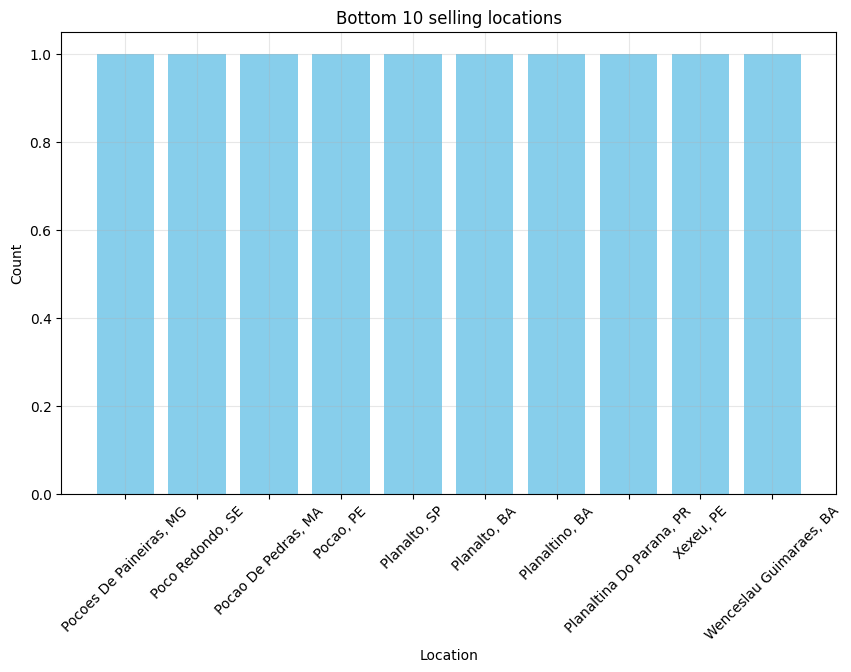

In [33]:
# bottom 10 selling locaton
plt.figure(figsize=(10, 6))
plt.bar(data_customers['location'].tail(10), data_customers['orders_count'].tail(10), color = 'skyblue')
plt.title('Bottom 10 selling locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

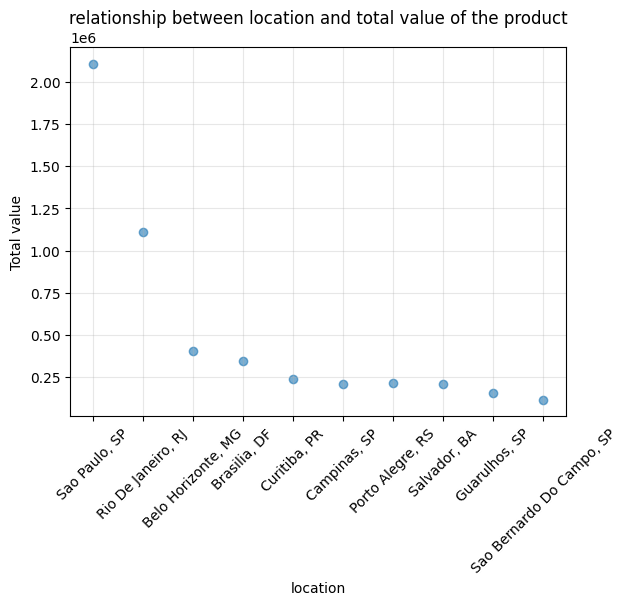

In [40]:
# scatter plot of location vs total value.
plt.scatter(data_customers['location'].head(10), data_customers['total_value'].head(10), alpha = 0.6)
plt.title('relationship between location and total value of the product')
plt.xlabel('location')
plt.ylabel('Total value')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [43]:
fig  = go.Figure()

fig.add_trace(
    go.Bar(
        x = data_customers["location"].head(10),
        y = data_customers["orders_count"].head(10),
        name = "Number of orders",
        marker_color = "rgb(64, 244, 208)",

    )
)
fig.add_trace(
    go.Scatter(
        x = data_customers["location"].head(10),
        y = data_customers["total_value"].head(10),
        name = "GMV",
        yaxis = "y2",
        marker_color = "rgb(255, 160, 122)",
        mode = "lines+markers",
    )
)

fig.update_layout(
    title = dict(text="<b>Top 10 Selling Geolocation<b>",
                 font=dict(size=12, family="Arial", color="black")),
    plot_bgcolor = "white",
    yaxis = dict(side = "left", range = [0, max(data_customers["orders_count"]) + 1000], showgrid=False, zeroline = True, showline = False, showticklabels = False),
    yaxis2 = dict(side = "right", overlaying = "y", showgrid = False, zeroline = False, showline = False, showticklabels = False),
    xaxis = dict(showline = True, linecolor = "rgb(204, 204, 204)", linewidth = 2),
    legend = dict(orientation = 'h', x = 0.8, y = 1.1),
    annotations = [dict(text="Created by Cyrus", xref="paper", yref="paper", x = 1, y  = .45,
                        showarrow=False, font=dict(size = 10, color = "gray", family="Arial"))],
    hovermode = "x unified"

)
fig.show(renderer = "iframe_connected")